<a href="https://colab.research.google.com/github/MatthewPuttroff/FinTech-Career/blob/main/Twitter_Sentiment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pycountry
#!pip install langdetect
#!pip install python-dotenv

In [5]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from tweepy import OAuthHandler

In [3]:
# your Twitter API key and API secret & Microsoft Azure API Credentials
consumerKey = "dMFORZOigDCZUhapEMKyBzbWy"
consumerSecret = "IZ4sYdcnIQReOVHP2JZyT6VvNSmUraUdWXICW28Styv9DQcN87"
accessToken = "198437248-LAybxJyk7NYCiPLgav0ui52r8D5g6AnpxzuCk17k"
accessTokenSecret = "mRJDUYipsmfHhvwZctlJyM9cd9blLFOUgNwkI3Zqdip0N"

# authenticate
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#!pip install tweepy --upgrade

     |████████████████████████████████| 65 kB 2.2 MB/s 
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [8]:
'''import nltk
nltk.download('comtrans')
from zipfile import ZipFile
file_loc = '/root/nltk_data/corpora/comtrans.zip'
with ZipFile(file_loc, 'r') as z:
  z.extractall('/root/nltk_data/corpora/')'''

[nltk_data] Downloading package comtrans to /root/nltk_data...


In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [22]:
#Sentiment Analysis
def  percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, lang="en", q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: $NFLX
Please enter how many tweets to analyze: 500


In [23]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  500
positive number:  188
negative number:  69
neutral number:  243


In [24]:
tweet_list

,0
0,RT @saxena_puru: The weakness is spreading and...
1,RT @saxena_puru: The weakness is spreading and...
2,$ROKU will always get squeezed by the Content ...
3,@njnairinvest82 @roccobertino @WOLF_Financial ...
4,RT @saxena_puru: The weakness is spreading and...
...,...
495,RT @TomAdam42241521: It doesn't bother #Biden ...
496,$nflx back test the breakout. https://t.co/cey...
497,$AAPL WILL FOREVER BE MY FAVORITE\n127 AVERAGE...
498,RT @investwithbtm: Biggest stock declines from...


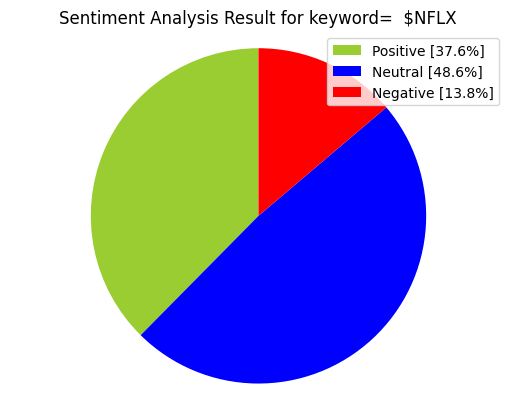

In [25]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [17]:
#columns= ["pos", "neu", "neg"]

In [18]:
#sizes = [positive, neutral, negative]

In [19]:
#x=pd.DataFrame(sizes, columns)

In [20]:
x = pd.DataFrame({"pos": [positive],
                   "neu": [neutral],
                   "neg": [negative]},
                  index=[keyword])

In [21]:
x.head()

,pos,neu,neg
NFLX,34.6,51.2,14.2
